In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report



In [66]:
# Load the dataset
data = pd.read_csv('transaction_anomalies_dataset.csv')
data


,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings


In [67]:
# Q1: Data inspection
print("Data Info:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
Data Info:
 None


In [68]:
print("Null values:\n", data.isnull().sum())

Null values:
 Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


In [69]:
print("Descriptive statistics:\n", data.describe())

Descriptive statistics:
        Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225               

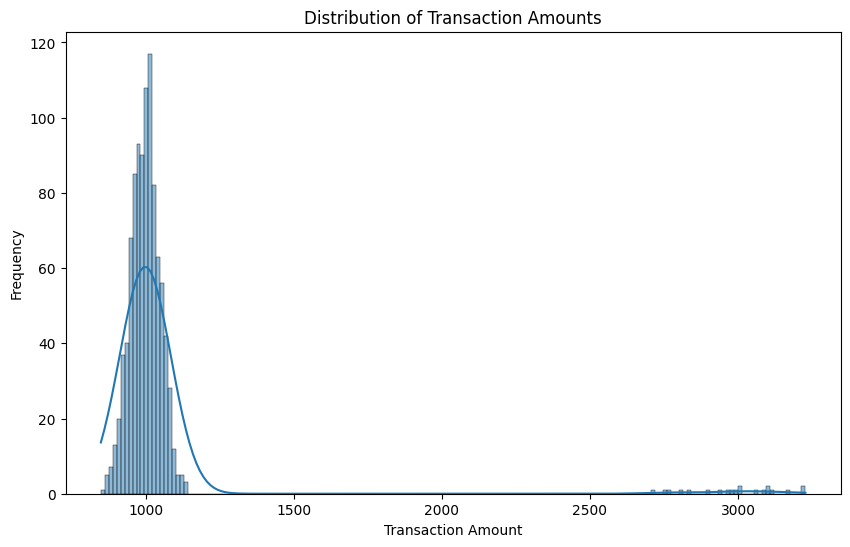

In [70]:
# Q2: Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

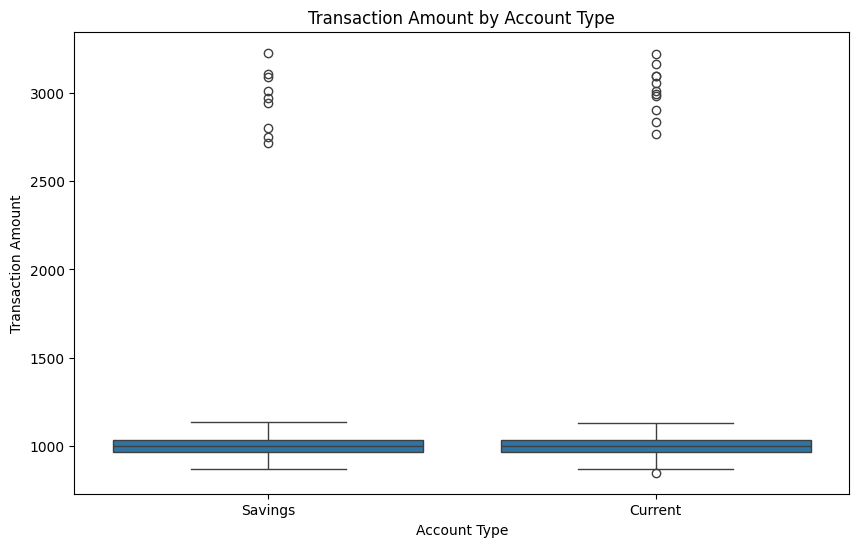

In [71]:
# Q3: Distribution of transaction amounts by account type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data)
plt.title('Transaction Amount by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()

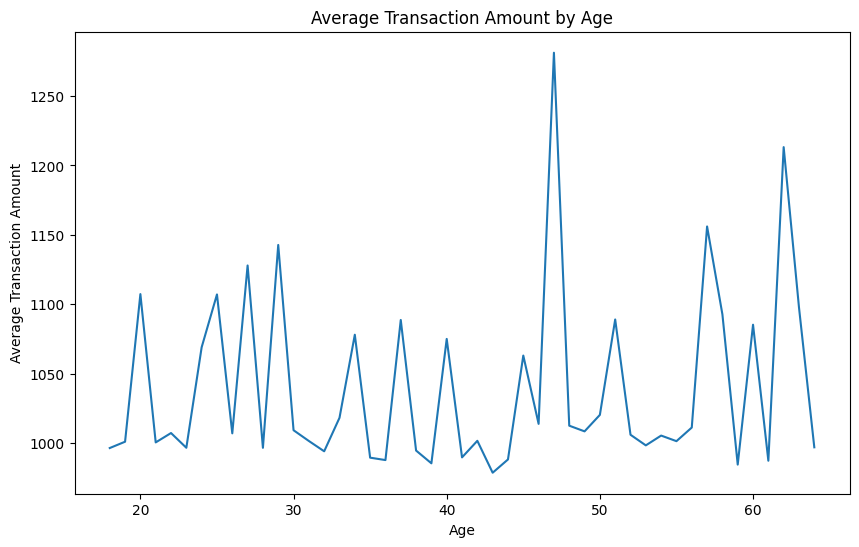

In [72]:
# Q4: Average transaction amount by age
avg_transaction_by_age = data.groupby('Age')['Transaction_Amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_transaction_by_age, x='Age', y='Transaction_Amount')
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.show()

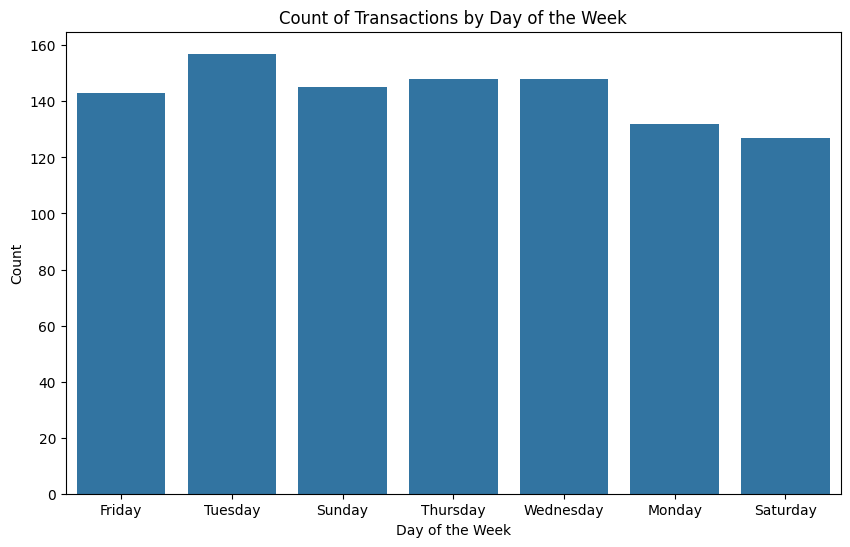

In [73]:
# Q5: Count of transactions by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=data)
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

In [74]:
# Convert all columns with string data to float if possible
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

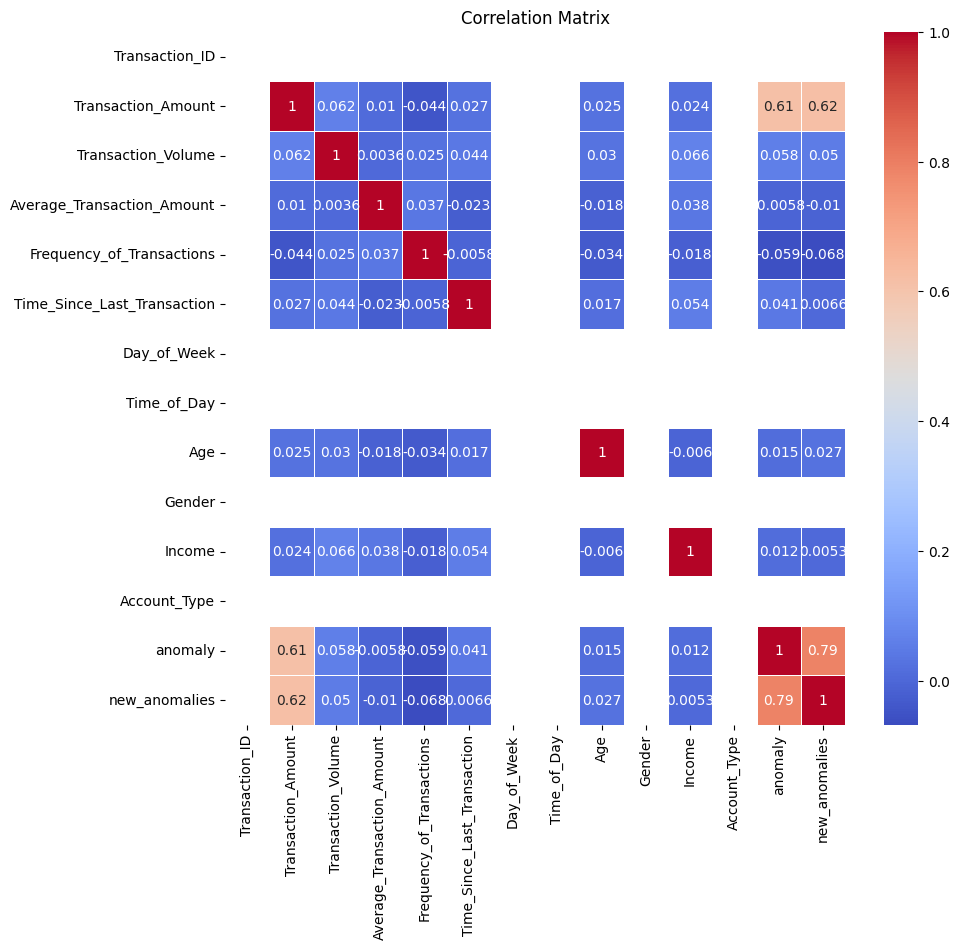

In [81]:
# Q6: Correlation matrix
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [76]:
# Data preprocessing for model training
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 
            'Income']

X = data[features]
print("Features data shape:", X.shape)
print("Features data preview:\n", X.head())

# Ensure there's enough data for model fitting
if X.shape[0] == 0:
    raise ValueError("The features dataset is empty after preprocessing.")

Features data shape: (1000, 7)
Features data preview:
    Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
0         1024.835708                   3                  997.234714   
1         1013.952065                   4                 1020.210306   
2          970.956093                   1                  989.496604   
3         1040.822254                   2                  969.522480   
4          998.777241                   1                 1007.111026   

   Frequency_of_Transactions  Time_Since_Last_Transaction  Age   Income  
0                         12                           29   36  1436074  
1                          7                           22   41   627069  
2                          5                           12   61   786232  
3                         16                           28   61   619030  
4                          7                            7   56   649457  


In [77]:

# Q8: Calculate the number of anomalies in the data
model = IsolationForest(contamination=0.05)
model.fit(X)
data['anomaly'] = model.predict(X)
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

anomaly_ratio = data['anomaly'].mean()
print(f"Anomaly ratio: {anomaly_ratio:.2%}")

Anomaly ratio: 5.00%


In [78]:
# Q9: Fit Isolation Forest and get predictions
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(X)
predictions = isolation_forest.predict(X)
binary_predictions = np.where(predictions == -1, 1, 0)

In [79]:
# Q10: Show the classification report
print(classification_report(data['anomaly'], binary_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       950
           1       0.80      0.80      0.80        50

    accuracy                           0.98      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.98      0.98      0.98      1000



In [80]:
# Q11: Use the trained model to detect anomalies and bring results
def detect_anomalies(model, X):
    pred = model.predict(X)
    return np.where(pred == -1, 1, 0)

new_anomalies = detect_anomalies(isolation_forest, X)
data['new_anomalies'] = new_anomalies

print("New anomalies detected:\n", data[data['new_anomalies'] == 1])

New anomalies detected:
      Transaction_ID  Transaction_Amount  Transaction_Volume  \
20              NaN          934.502466                   1   
23              NaN          977.911699                   4   
46              NaN          993.214131                   4   
59              NaN         2769.890232                   3   
110             NaN         1000.920919                   1   
124             NaN          986.555565                   4   
127             NaN         1062.304260                   3   
133             NaN         1016.306651                   4   
147             NaN         2802.097817                   2   
151             NaN         1067.831669                   3   
155             NaN         1129.885232                   4   
178             NaN          935.984780                   1   
188             NaN         3094.817415                   3   
230             NaN         2752.637650                   4   
238             NaN         10